# Oasis1 Data Visualisation

## importing 

### packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [256]:
os.getcwd()

'/Users/guehojang/code/Gueho/mkvph0ch/memobrain/notebooks'

### Dataset(Oasis1)

In [1]:
oasis1_cs_path = '../raw_data/OASIS1/oasis_cross-sectional.csv'

In [3]:
oasis1_cs = pd.read_csv(oasis1_cs_path)

In [4]:
oasis1_cs

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


## Cleaning data

### Delete rows with NaN in CDR(Target) column

In [169]:
oasis1_cs = oasis1_cs[oasis1_cs.CDR.notna()]

## Data Visualisation

### Sex. Pieplot

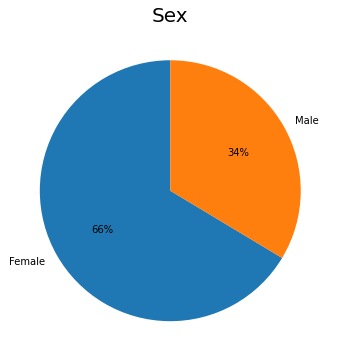

In [243]:
plt.figure(figsize = (12, 6))
plt.pie([fem_count, male_count], labels = ['Female', 'Male'], startangle=90, autopct = '%1.0f%%')
plt.title('Sex', fontsize = 20)
plt.show()

### Age. Histoplot w/ KDE

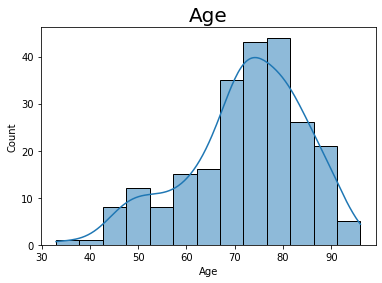

In [244]:
sns.histplot(oasis1_cs.Age, kde = True)
plt.title('Age', fontsize = 20)
plt.show()

### Education level. barplot + pieplot

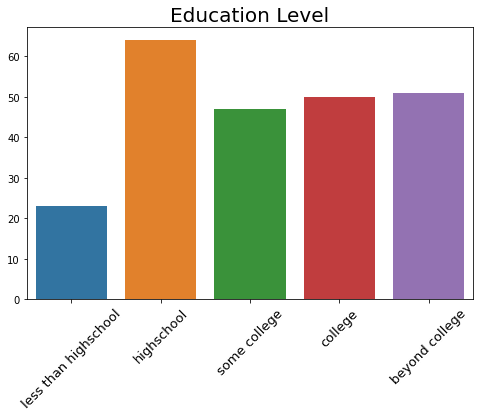

In [247]:
plt.figure(figsize = (8, 5))
plt.title('Education Level', fontsize = 20)
ax = sns.barplot(x = ['less than highschool', 'highschool', 'some college', 'college', 'beyond college'], 
            y = oasis1_cs.groupby('Educ').count()['ID'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 13)
plt.show()


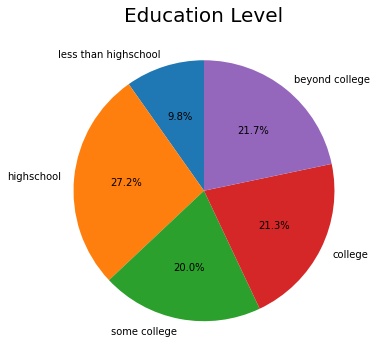

In [248]:

plt.figure(figsize = (12, 6))
plt.title('Education Level', fontsize = 20)
plt.pie(oasis1_cs.groupby('Educ').count()['ID'].values, 
        labels = ['less than highschool', 'highschool', 'some college', 'college', 'beyond college'], 
        autopct='%1.1f%%', startangle=90)
plt.show()

### Social Economy Status. barplot

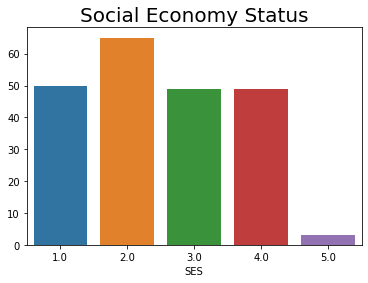

In [249]:
plt.title('Social Economy Status', fontsize = 20)
sns.barplot(x = oasis1_cs.groupby('SES').count()['ID'].index, 
            y = oasis1_cs.groupby('SES').count()['ID'].values)
plt.show()

### Mini Mental State Examination. Encoding -> piechart

In [155]:
#manual endoding function
def labeling(x):
    if x > 24:
        return "normal"
    elif (x > 20) and (x <= 24):
        return "mild"
    elif (x > 10) and (x <= 20):
        return "moderate"
    elif x <= 10:
        return "severe"

In [ ]:
oasis1_cs.MMSE = oasis1_cs.MMSE.apply(lambda x : labeling(x))

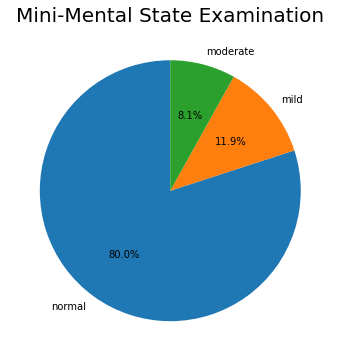

In [221]:

plt.figure(figsize = (12, 6))
plt.title('Mini-Mental State Examination', fontsize = 20)
plt.pie(oasis1_cs.groupby('MMSE').count()['ID'].sort_values(ascending=False).values, 
        labels = oasis1_cs.MMSE.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

### Clinical Dementia Rating. Encoding -> piechart

In [211]:
#Manual Encoding Function
def CDR_labeling(x):
    if x == 0:
        return "nondemented"
    elif x == 0.5:
        return "very mild dementia"
    elif x == 1:
        return "mild dementia"
    elif x == 2:
        return "moderate dementia"

In [212]:
oasis1_cs.CDR = oasis1_cs.CDR.apply(lambda x : CDR_labeling(x))

/Users/guehojang/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


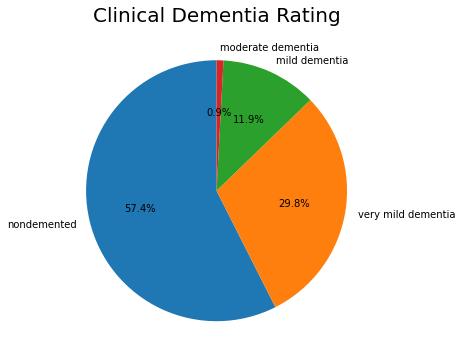

In [222]:
plt.figure(figsize = (12, 6))
plt.title('Clinical Dementia Rating', fontsize = 20)
plt.pie(oasis1_cs.CDR.value_counts().values, 
        labels = oasis1_cs.CDR.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()

### eTIV, nWBV, ASF. boxplot + histoplot w/ kde

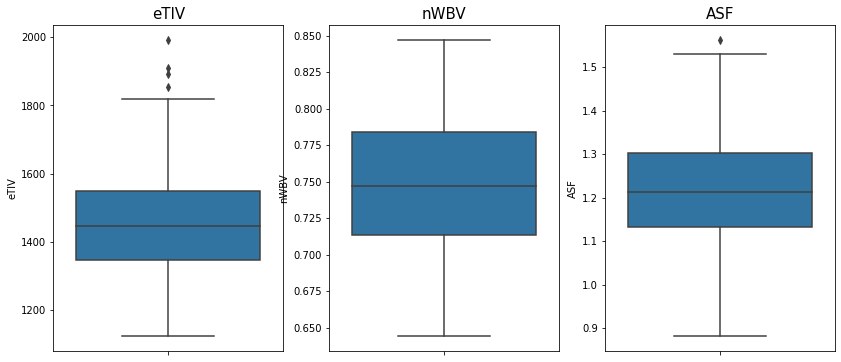

In [235]:
volumes = ['eTIV', 'nWBV', 'ASF']

fig, axs = plt.subplots(1, 3, figsize = (14, 6))
sns.boxplot(data = oasis1_cs, y = 'eTIV', ax = axs[0])
sns.boxplot(data = oasis1_cs, y = 'nWBV', ax = axs[1])
sns.boxplot(data = oasis1_cs, y = 'ASF', ax = axs[2])
axs[0].set_title('eTIV', fontsize = 15)
axs[1].set_title('nWBV', fontsize = 15)
axs[2].set_title('ASF', fontsize = 15)
plt.show()

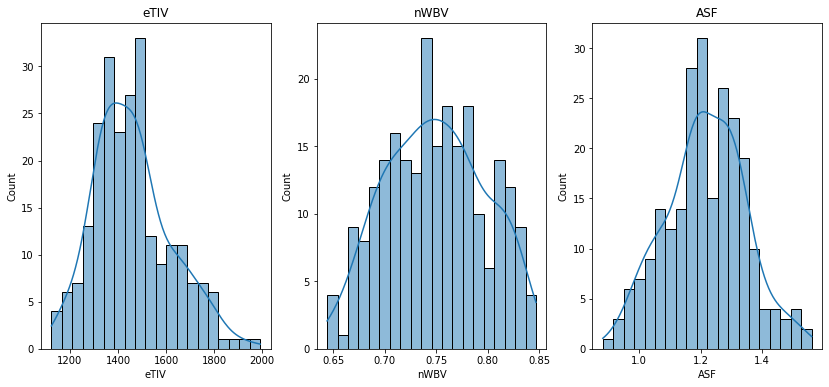

In [238]:
fig, axs = plt.subplots(1, 3, figsize = (14, 6))
sns.histplot(data = oasis1_cs, x = 'eTIV', ax = axs[0], bins = 20, kde = True)
sns.histplot(data = oasis1_cs, x = 'nWBV', ax = axs[1], bins = 20, kde = True)
sns.histplot(data = oasis1_cs, x = 'ASF', ax = axs[2], bins = 20, kde = True)
axs[0].set_title('eTIV', fontsize = 12)
axs[1].set_title('nWBV', fontsize = 12)
axs[2].set_title('ASF', fontsize = 12)
plt.show()